# Project: House Price Prediction

## Dataset Features:
- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

## Step 1: Data Preprocessing and Exploration

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [166]:
data  = pd.read_csv('Housing.csv')

In [167]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [169]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [170]:
data['price_per_sqft'] = data['price'] / data['area']

In [171]:
data = data[(data['price_per_sqft'] >= 100) & (data['price_per_sqft'] <= 1000)]

#### - Checking missing value/treatment of missing value:-

In [172]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price_per_sqft      0
dtype: int64

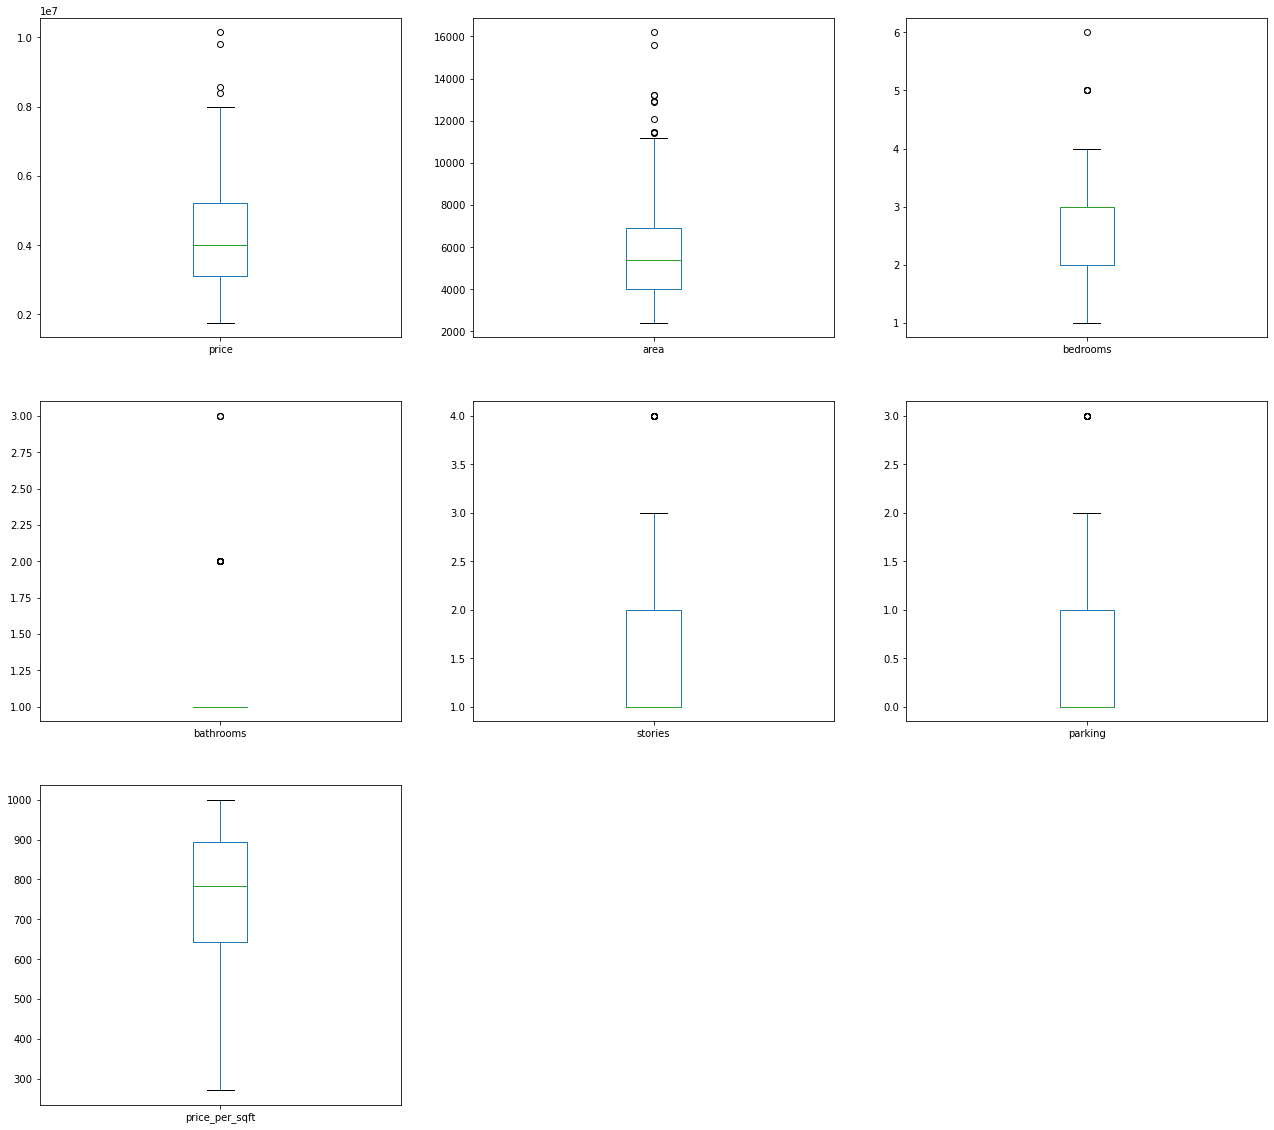

In [173]:
data.plot(kind='box', subplots=True, figsize=(22,20), layout=(3,3))
plt.show()

In [174]:
min_max_values = data.agg({'price': ['min', 'max'],
                           'area': ['min', 'max'],
                           'bedrooms': ['min', 'max'],
                           'bathrooms': ['min', 'max'],
                           'parking': ['min', 'max'],
                           'price_per_sqft': ['min', 'max']})

In [175]:
print(min_max_values)

        price   area  bedrooms  bathrooms  parking  price_per_sqft
min   1750000   2400         1          1        0       270.39555
max  10150000  16200         6          3        3      1000.00000


In [176]:
# Define lower and upper bounds for each numerical feature 
lower_bounds = {
    'price': 1750000,
    'area': 2400,  
    'bedrooms': 1,  
    'bathrooms': 1,
    'parking': 0,
    'price_per_sqft': 270.39555
}

In [177]:
upper_bounds = {
    'price': 10150000,
    'area': 16200,  
    'bedrooms': 6,  
    'bathrooms': 3,
    'parking': 3,
    'price_per_sqft': 1000.00000
}

In [178]:
# Apply capping to remove outliers
for feature, lower_bound in lower_bounds.items():
    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])

for feature, upper_bound in upper_bounds.items():
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

#### - Visual Exploration

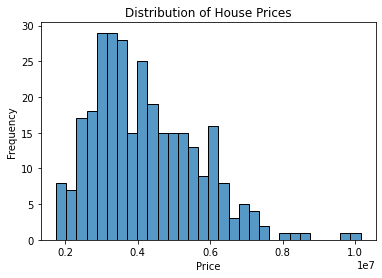

In [179]:
# Visualize the distribution of the target variable 'Price'
sns.histplot(data['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

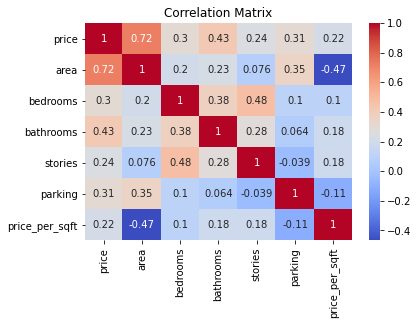

In [180]:
# Visualize correlations between numerical features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

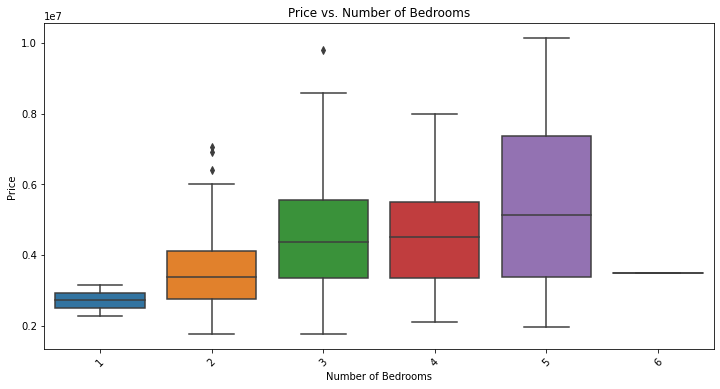

In [181]:
# Explore categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms')
plt.xticks(rotation=45)
plt.show()

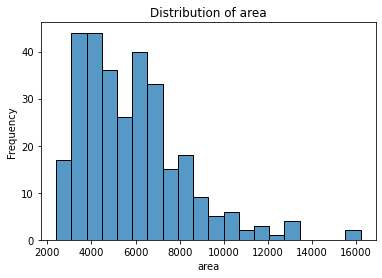

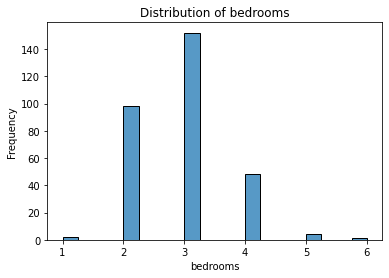

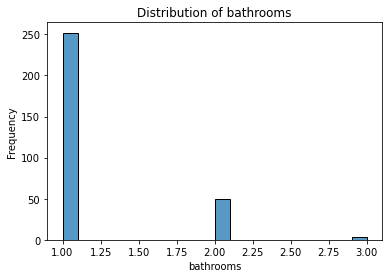

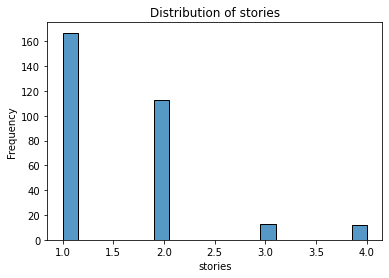

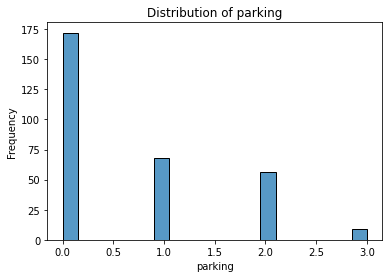

In [182]:
# Visualize the distribution of numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in numerical_features:
    sns.histplot(data[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

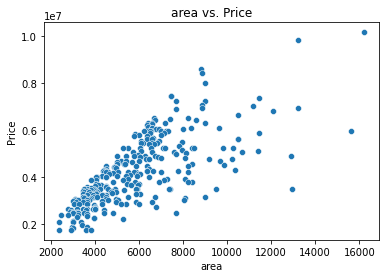

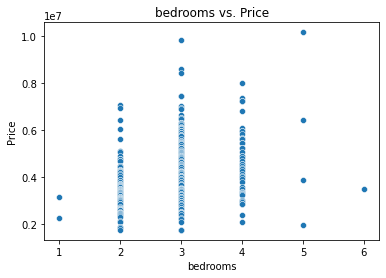

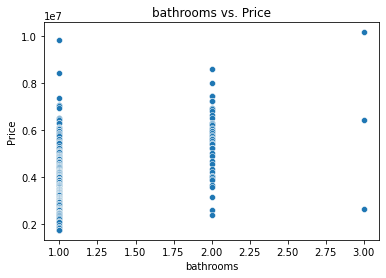

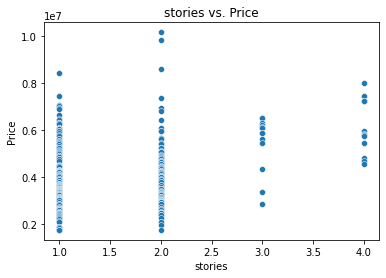

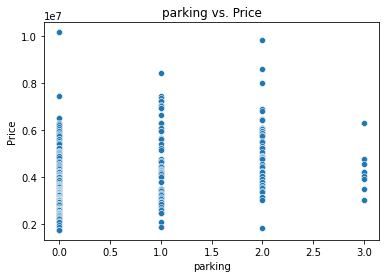

In [183]:
# Explore the relationship between numerical features and the target variable
for feature in numerical_features:
    sns.scatterplot(x=feature, y='price', data=data)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs. Price')
    plt.show()

## Step 2: Data Encoding

In [184]:
data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].replace({'yes':1,'no':0})
data['basement'] = data['basement'].replace({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].replace({'yes':1,'no':0})
data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished':2,'semi-furnished':1,'unfurnished':0})
data['prefarea'] = data['prefarea'].replace({'yes':1,'no':0})

In [185]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,626.543210
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2,742.424242
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,2,974.431818
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,1,946.478873
37,7980000,9000,4,2,4,1,0,0,0,1,2,0,2,886.666667


## Step 3: Feature Selection and Splitting

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price_per_sqft']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [187]:
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

In [188]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
7,4.466622,2.843272,4.411018,0.566612,1,0,0,0,0,-0.777317,0,0,-0.769401
10,3.177102,0.187229,-0.445879,0.566612,1,0,1,0,1,1.513328,1,2,-0.070895
24,1.285806,0.187229,1.982570,0.566612,1,0,0,0,1,1.513328,0,2,1.327596
27,1.318044,0.187229,-0.445879,-0.762746,1,0,0,0,0,0.368005,0,1,1.159102
37,1.371774,1.515251,1.982570,3.225327,1,0,0,0,1,1.513328,0,2,0.798567


In [190]:
X.shape

(305, 13)

In [155]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
rfr = RandomForestRegressor()

In [158]:
model = rfr.fit(X_train,y_train)

In [159]:
y_pred_rfr = model.predict(X_test)

In [160]:
r2_score(y_pred_rfr,y_test)

0.9528932145660108

In [161]:
import joblib

In [164]:
joblib.dump(model, 'models/trained_model_1.joblib')

['models/trained_model_1.joblib']